In [1]:
%load_ext autoreload  
%autoreload 2  

In [2]:
from ocpy.data import Data
# data okuma check

data = Data.from_file("ny_vir.xlsx")
data = data.calculate_weights()

(<Figure size 1000x700 with 2 Axes>,
 (<Axes: ylabel='O−C'>, <Axes: xlabel='Cycle', ylabel='Resid'>))

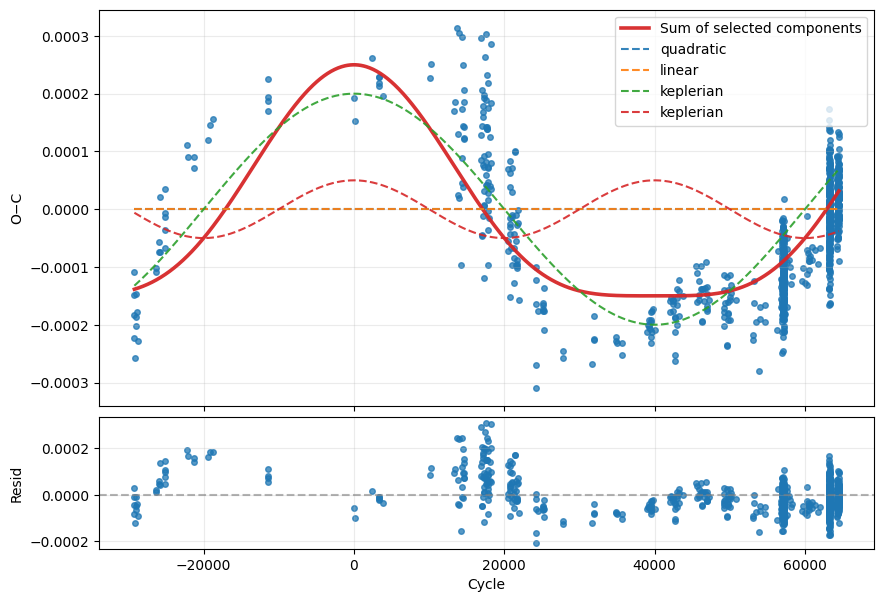

In [3]:
from ocpy.oc import Linear, Quadratic, Keplerian, Parameter

oc = data.calculate_oc(reference_minimum=2453174.442769,
                       reference_period=0.101015969,
                       model_type="pymc")
oc = oc[oc["labels"] != "vis"]

# 1) Linear (y = a*x + b)
lin = Linear(
    a=Parameter(value=0.0,   std=2e-5,  min=-1e-3,  max=1e-3,  fixed=False),
    b=Parameter(value=0.0,   std=2e-3,  min=-0.1,   max=0.1,   fixed=False),
)

# 2) Quadratic (q * x^2)
quad = Quadratic(
    q=Parameter(value=0.0,   std=5e-10, min=-1e-8,  max=1e-8,  fixed=False),
)

# 3) Keplerian #1 (yaklaşık 80k epoch)
lite1 = Keplerian(
    P     = Parameter(value=80000,  std=8_000,  min=30_000,  max=150_000, fixed=False),
    T0    = Parameter(value=60000,  std=5_000,                          fixed=False),
    amp   = Parameter(value=2.0e-4, std=1.0e-4, min=0.0,    max=1.0e-3,  fixed=False),
    e     = Parameter(value=0.0,    fixed=True),
    omega = Parameter(value=0.0,    fixed=True),
)

# 4) Keplerian #2 (yaklaşık 40k epoch)
lite2 = Keplerian(
    P     = Parameter(value=40000,  std=6_000,  min=10_000,  max=100_000, fixed=False),
    T0    = Parameter(value=30000,  std=5_000,                          fixed=False),
    amp   = Parameter(value=5.0e-5, std=2.5e-5, min=0.0,    max=5.0e-4,  fixed=False),
    e     = Parameter(value=0.0,    fixed=True),
    omega = Parameter(value=0.0,    fixed=True),
)

oc.plot_components_on_data([quad, lin, lite1, lite2])


In [4]:
res = oc.fit([lin, quad, lite1, lite2],
             progressbar=True, draws=3000, tune=2000, chains=4,
             target_accept=0.9)

Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [linear_a, linear_b, quadratic_q, keplerian1_amp, keplerian1_P, keplerian1_T0, keplerian2_amp, keplerian2_P, keplerian2_T0]


Output()

Sampling 4 chains for 2_000 tune and 3_000 draw iterations (8_000 + 12_000 draws total) took 368 seconds.


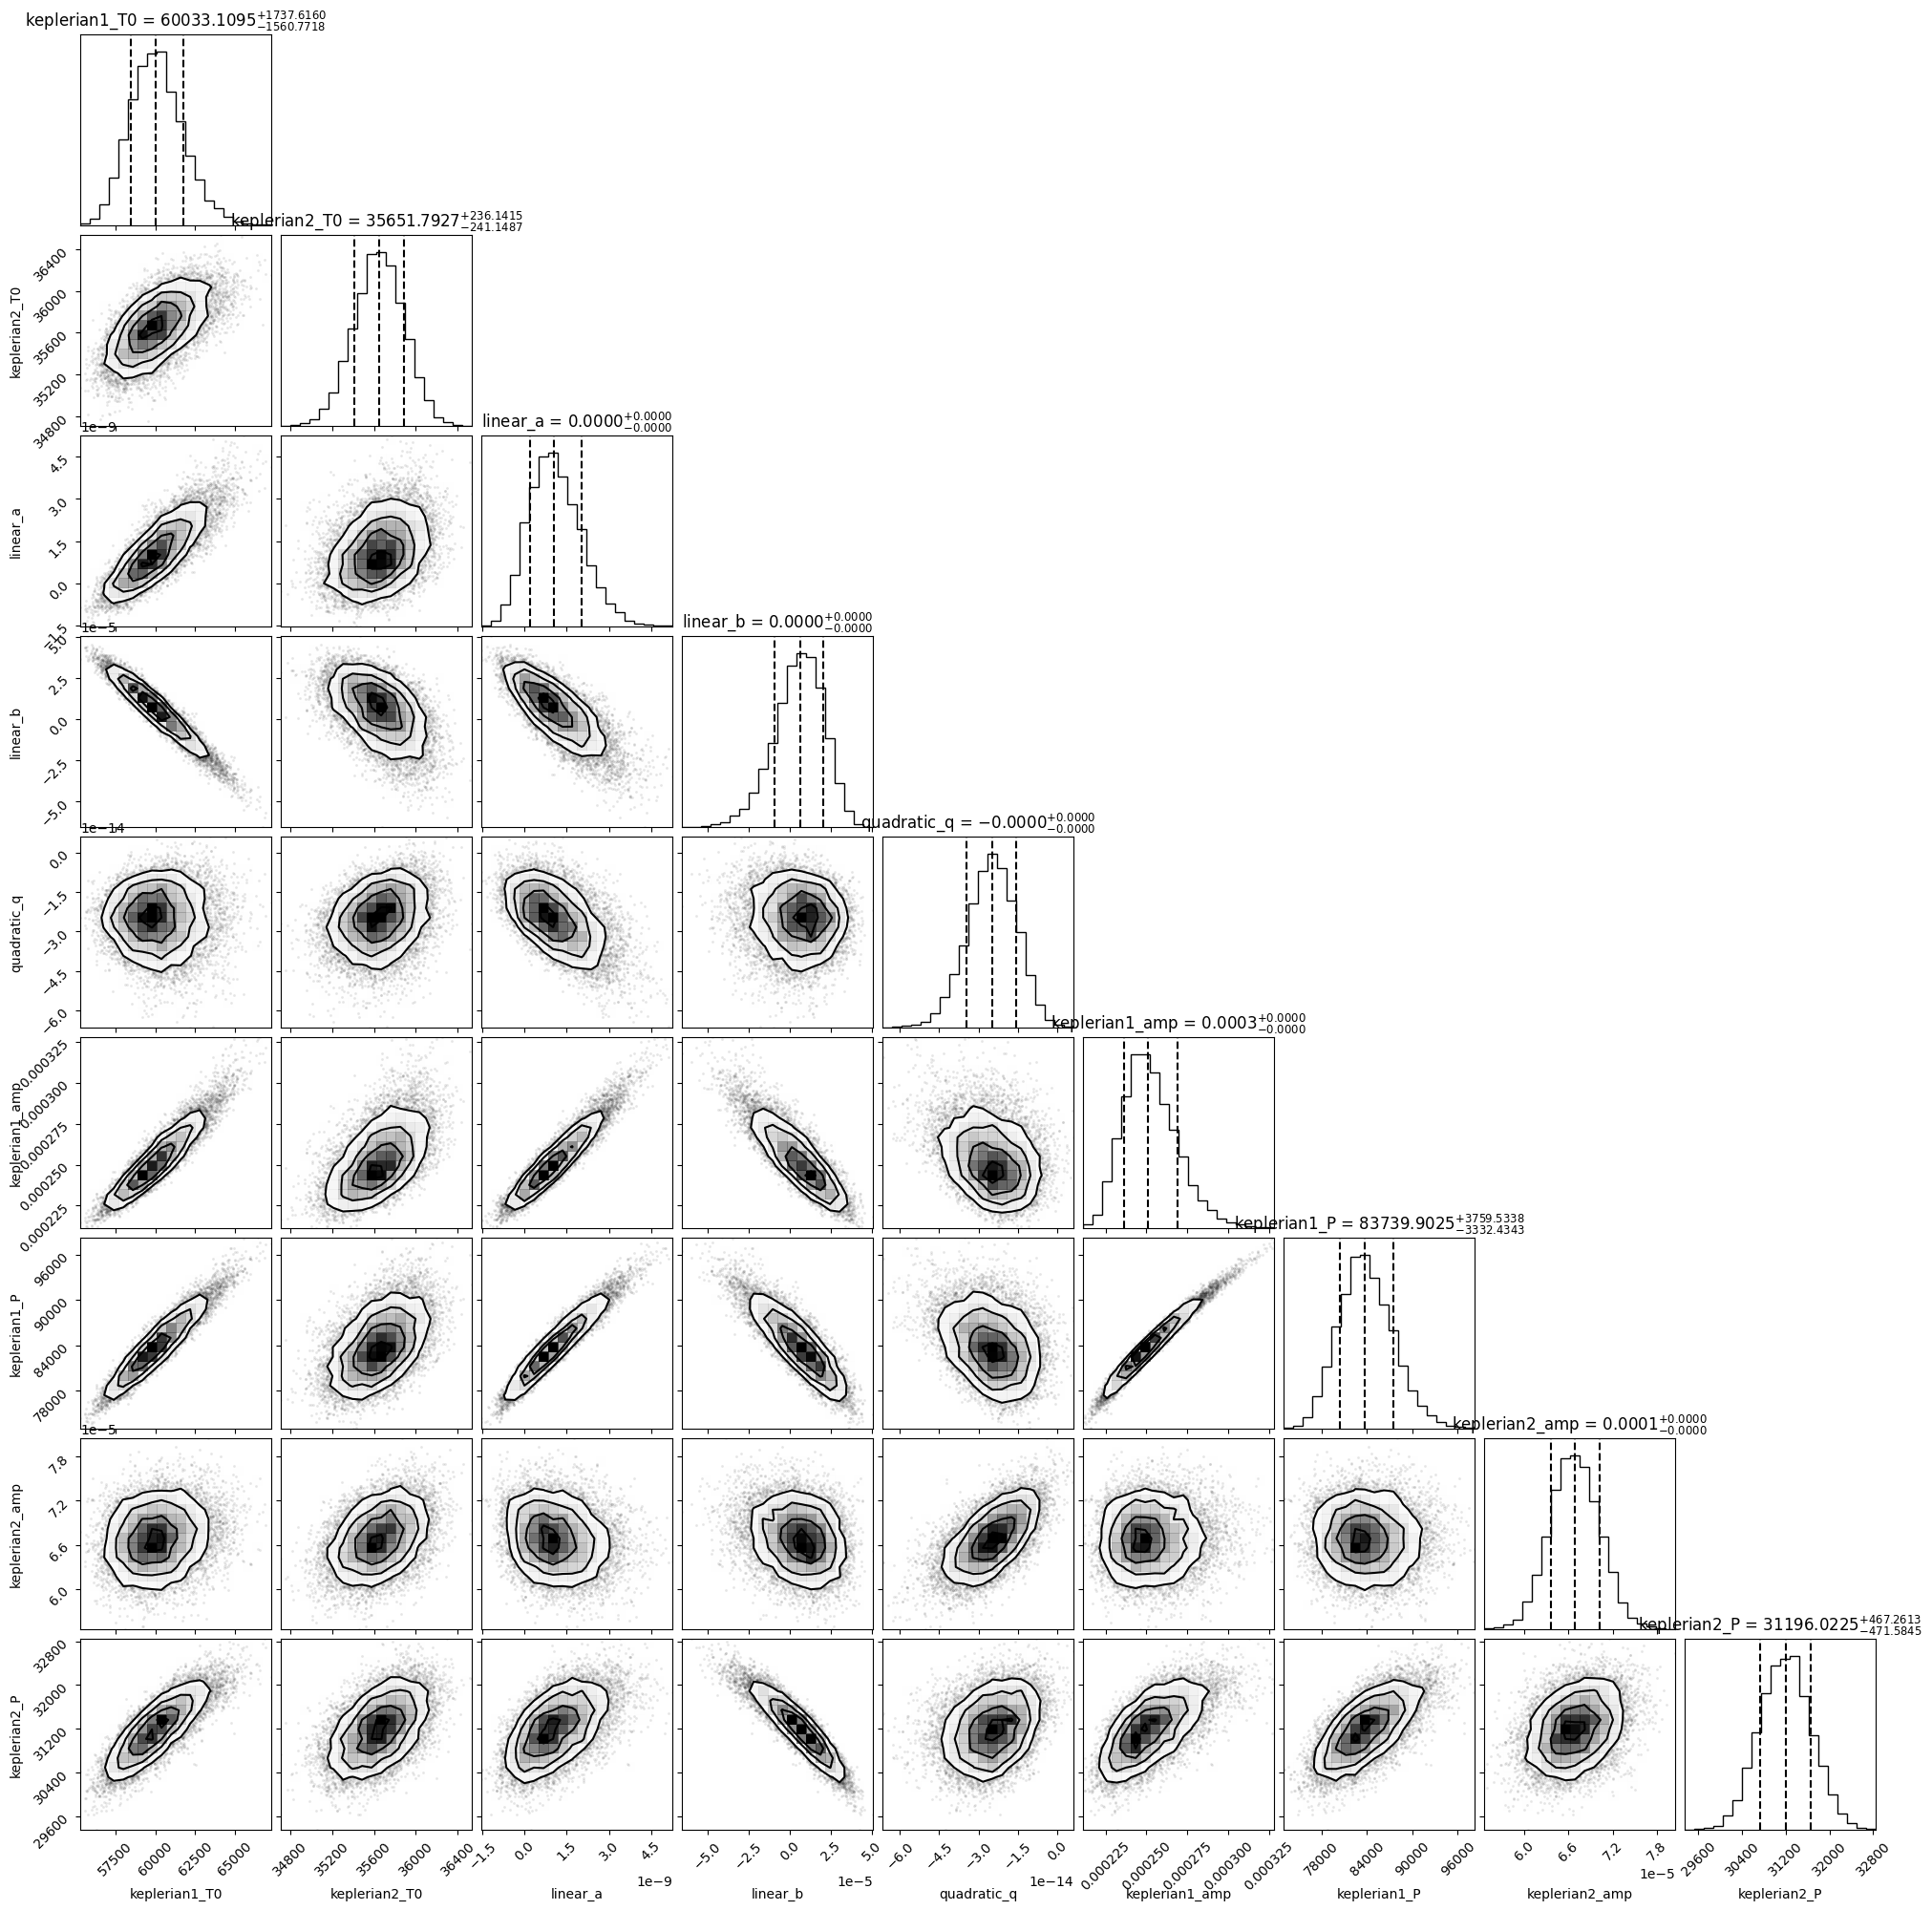

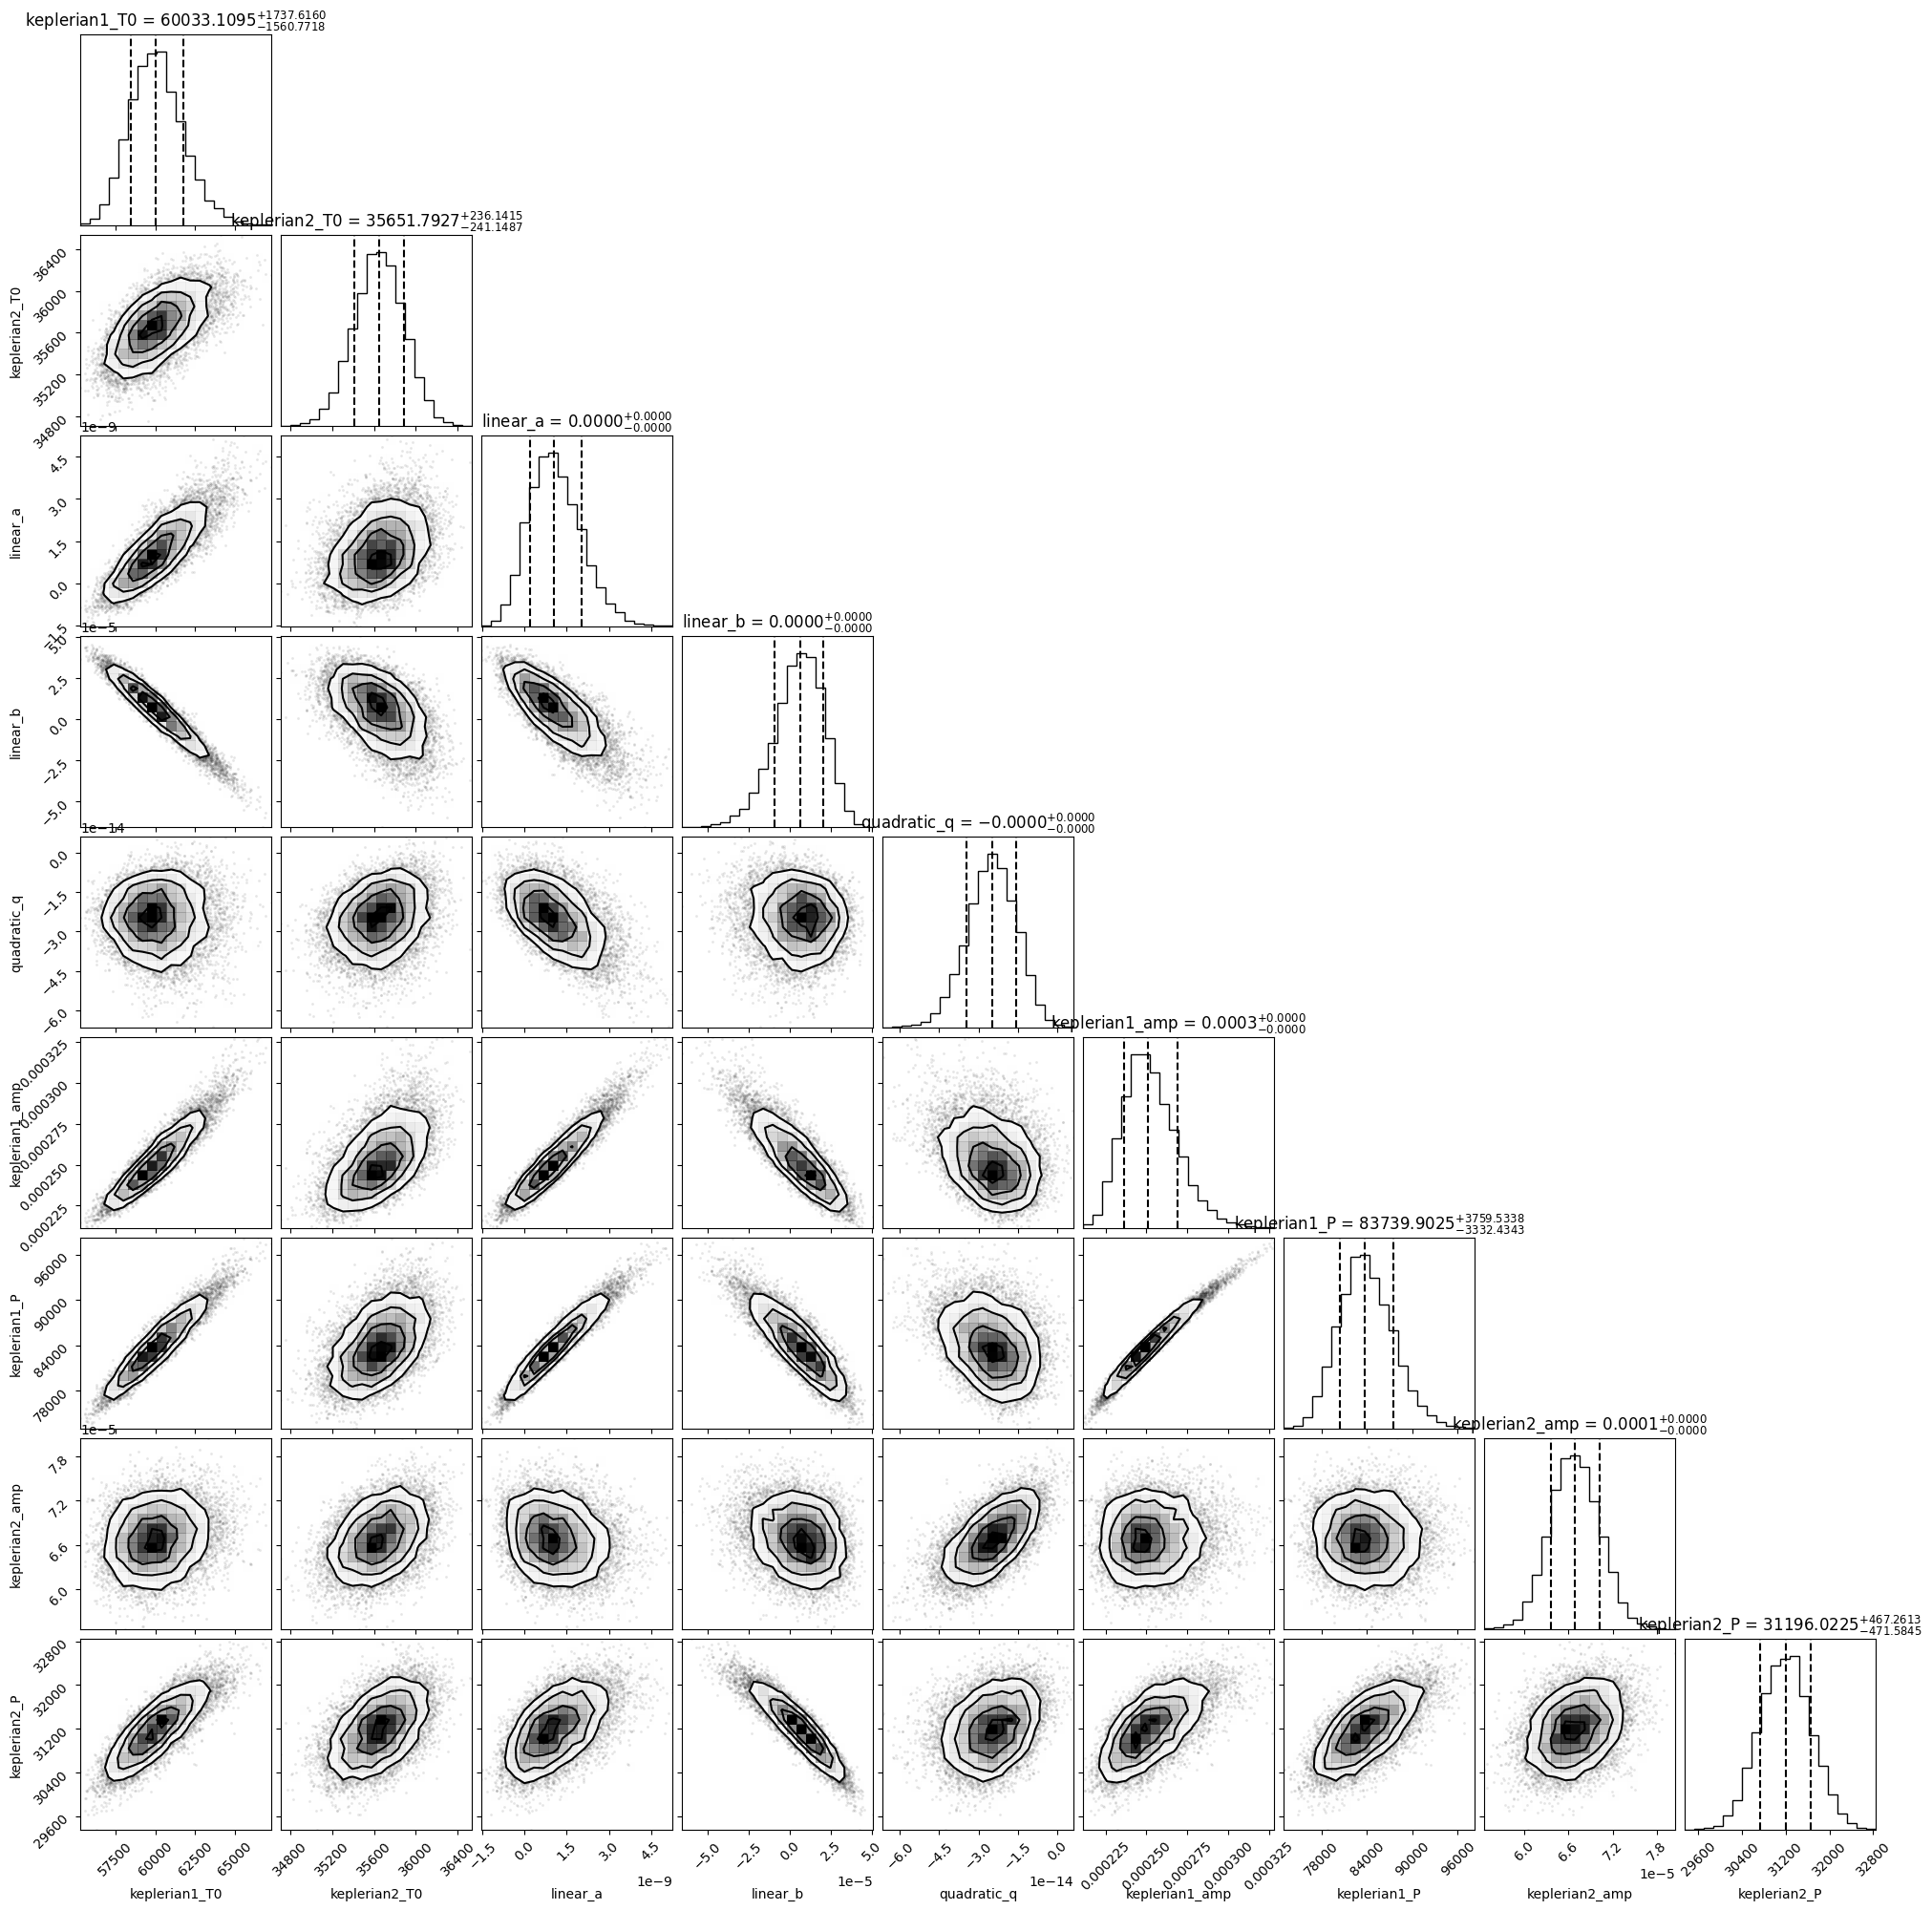

In [5]:
oc.create_corner_plot(res)

In [6]:
res

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

C:\Users\bar1s\Desktop\oc_py_bar1\oc_py\src\ocpy\oc_pymc.py:301: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


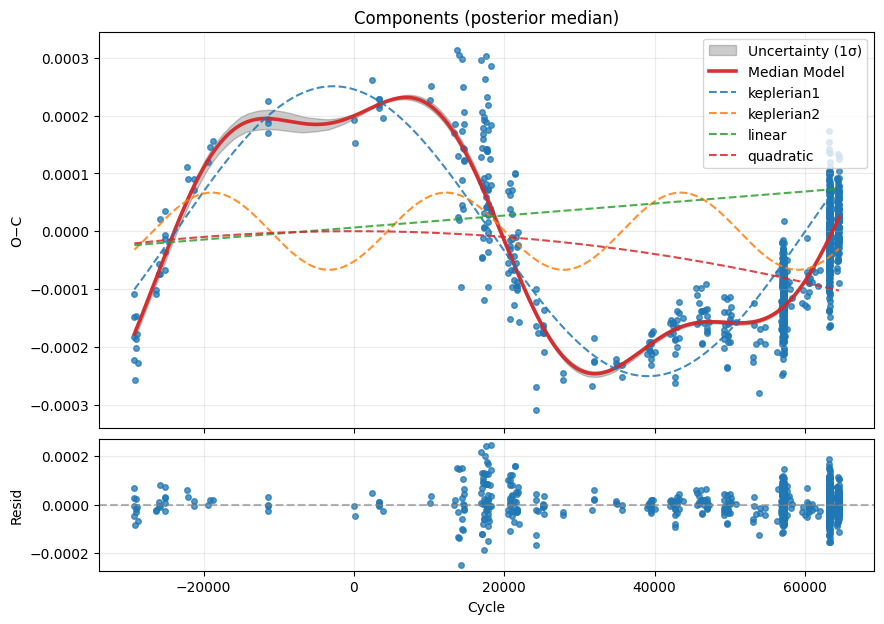

In [7]:
oc.fit_and_report(res)

In [8]:
res

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

(<Figure size 1000x700 with 2 Axes>,
 (<Axes: ylabel='O−C'>, <Axes: xlabel='Cycle', ylabel='Resid'>))

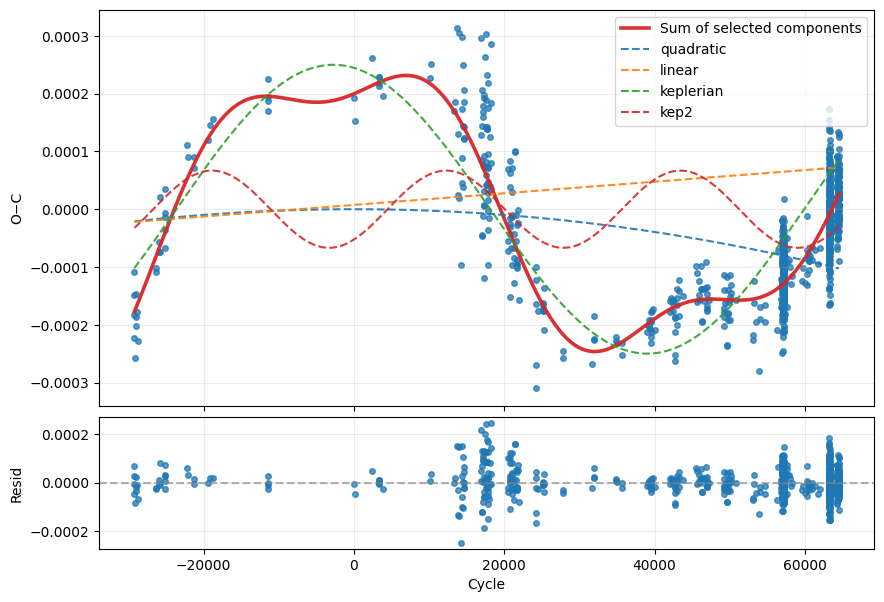

In [9]:
lin = Linear(
    a=Parameter(value=1.005e-09, fixed=False),
    b=Parameter(value=7.428e-06, fixed=False),
)

quad = Quadratic(
    q=Parameter(value=-2.464e-14, fixed=False),
)

lite1 = Keplerian(
    P=Parameter(value=8.352e+04, fixed=False),
    T0=Parameter(value=5.989e+04, fixed=False),
    amp=Parameter(value=0.00025, fixed=False),
    e=Parameter(value=0.0, fixed=True),
    omega=Parameter(value=0.0, fixed=True),
)

lite2 = Keplerian(
    name="kep2",
    P=Parameter(value=3.117e+04, fixed=False),
    T0=Parameter(value=3.564e+04, fixed=False),
    amp=Parameter(value=6.681e-05, fixed=False),
    e=Parameter(value=0.0, fixed=True),
    omega=Parameter(value=0.0, fixed=True),
)

oc.plot_components_on_data([quad, lin, lite1, lite2])